<a href="https://colab.research.google.com/github/mersalas/MLBS-2025_workshop/blob/main/Lab_2b_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.text.all import *
import pandas as pd

Download the [Coronavirus tweets NLP](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification)

In [ ]:
# Unzip folder
from zipfile import ZipFile
with ZipFile("/content/corona_tweet.zip", "r") as archive:
             archive.extractall("corona_tweet")

In [ ]:
# Read csv file
text_df = pd.read_csv("/content/corona_tweet/Corona_NLP_test.csv", encoding='latin1')

In [ ]:
# Output first 5 rows
text_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh,Neutral


In [ ]:
# Create dataloader
dls = TextDataLoaders.from_df(text_df,
                              text_col = 'OriginalTweet',
                              label_col = 'Sentiment',
                              valid_pct = 0.20,
                              bs = 64)

In [ ]:
dls.show_batch()

,text,category
0,"xxbos xxmaj being xxmaj an xxmaj xxunk xxmaj during xxmaj covid-19 xxmaj is xxmaj horrible . xxmaj canât xxmaj go xxmaj to xxmaj the xxmaj xxunk xxmaj club xxmaj or xxmaj gym , xxmaj fights xxmaj are xxmaj being xxmaj cancelled . xxmaj diet xxmaj is xxmaj fucked xxmaj cause xxmaj you xxmaj canât xxmaj get xxmaj your xxmaj hands xxmaj on xxmaj decent xxmaj food xxmaj from xxmaj everyone xxmaj panic xxmaj buying xxmaj everything . xxmaj if xxmaj your xxmaj put xxmaj in xxmaj lockdown xxmaj your xxmaj run xxmaj will xxmaj be xxmaj your 3 xxmaj xxunk xxmaj xxunk . ? ?",Extremely Negative
1,xxbos xxup nyc xxmaj water . xxup is xxup cvs xxup price xxup gouging ? xxup is xxup their xxup mass xxup panic ? xxup this xxup citizen xxup xxunk xxup is xxup on xxup the xxup case . xxup going xxup where xxup no xxup one xxup wants xxup to xxup go … xxunk xxup for a xxup case xxup of xxup water xxup in xxup nyc . xxup its xxup getting xxup crazy . # coronavirusupdate # coronavirus # toiletpaper # xxup covid19 # toiletpapercrisis # xxunk # qanon # xxunk https : / / t.co / xxunk,Extremely Negative
2,xxbos xxmaj hey guys ! xxmaj schools closing after xxmaj tuesday for 3 weeks due to xxmaj covid-19 in my area so i xxunk xxmaj i 'd open a commission xxunk ! ! \r\r\n\r\r\n xxmaj xxunk xxrep 4 o xxunk \r\r\n\r\r\n xxup over xxup the xxup xxunk xxup xxunk xxrep 4 ! \r\r\n\r\r\n 5 xxmaj slots are open ! ! \r\r\n\r\r\n i charge $ 1 / hour xxunk \r\r\n\r\r\n xxup lots xxup more xxup info xxup in xxup thread xxrep 3 ! \r\r\n xxmaj do consider xxunk : d https : / / t.co / xxunk,Positive
3,xxbos xxmaj if i do n't die from # xxup covid?19 it 's because i will die of starvation xxup because xxup stupid xxup xxunk xxup idiots xxup are xxup buying xxup all xxup the xxup food xxup even xxup though xxup they xxup have xxup enough xxup to xxup stock xxup for xxup they 're xxup non - xxunk xxup xxunk xxup that xxup they xxup wo n't xxup have \r\r\n\r\r\n xxup to xxup hell xxup with xxup humanity xxup and xxup the # coronavirus xxrep 3 ? https : / / t.co / xxunk,Extremely Negative
4,xxbos $ xxunk xxup go xxup out xxup and xxup stock xxup up xxup on xxup food xxup and xxup water xxup people xxrep 3 ! xxup better xxup safe xxup than xxup sorry ! $ xxunk $ xxrep 3 q $ xxunk $ xxunk $ xxunk $ xxunk $ fb $ amzn $ xxunk $ xxunk $ xxunk $ c $ xxunk $ spot $ xxunk $ xxunk $ xxunk $ xxunk # xxup xxunk # coronavirus # xxup covid19 # coronaalert # xxup breaking # xxunk https : / / t.co / xxunk,Extremely Positive
5,"xxbos xxmaj news : xxmaj grocery stores canât keep food on the shelves . \r\r\n\r\r\n xxmaj mom : xxmaj should we stock up on food ? \r\r\n xxmaj me : xxmaj na , xxmaj iâll just buy yâall some beans and rice . \r\r\n\r\r\n xxmaj xxunk at xxunk - shelves empty ? xxunk 2 bags of rice ? \r\r\n\r\r\n xxmaj mom : xxmaj nice they had rice , xxunk the beans . \r\r\n xxmaj me : xxmaj um , so what xxunk was \r\r\n▁ # xxmaj covid_19 https : / / t.co / xxunk",Positive
6,"xxbos xxmaj just been to my local supermarket ! \r\r\n xxmaj empty shelves .. ! ! \r\r\n xxmaj no xxmaj rice , xxmaj no xxmaj pasta , xxmaj no xxmaj milk , xxmaj no xxmaj eggs , xxmaj no xxmaj kitchen xxmaj tissue , xxmaj no xxmaj toilet xxmaj paper , xxmaj no xxmaj handwash ! ! \r\r\n xxmaj what the fuck is wrong with people ? ! ? \r\r\n xxmaj just stop it ! ! xxmaj there 's no need , you selfish xxunk ! ! \r\r\n▁ # panickbuying # xxmaj covid_19",Extremely Negative
7,"xxbos xxmaj xxunk to world xxunk \r\r\n 1 . xxmaj buy stocks in # xxmaj dog and # cat # xxmaj food \r\r\n 2 . xxmaj go to # xxmaj grocery xxmaj store \r\r\n 3 . xxmaj fill up cart with xxmaj dog and xxmaj cat food \r\r\n 4 . xxmaj run around like a xxunk , maybe get into a xxunk \r\r\n 5 . xxmaj get someone to video it all and post it to social media \r\r\n 6 . xxmaj be # xxmaj rich \r\r\n▁ # coronapocalypse # xxmaj covid_19",Negative
8,"xxbos xxmaj in a xxmaj xxunk grocery store lineup , i said to my wife , "" this # cor

In [ ]:
# Create a LSTM learner
learn = text_classifier_learner(dls,
                                AWD_LSTM,
                                drop_mult=0.5,
                                metrics=[accuracy])

SuggestedLRs(valley=0.00363078061491251, slide=0.019054606556892395)

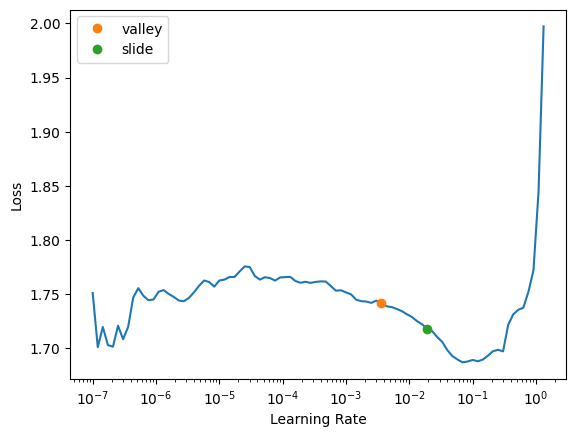

In [ ]:
# Find appropriate learning rate
torch.serialization.add_safe_globals([L])
learn.lr_find(suggest_funcs=(valley, slide))

In [ ]:
# Fine tune the model
learn.fine_tune(4, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,1.632297,1.481817,0.346509,00:03


epoch,train_loss,valid_loss,accuracy,time
0,1.452620,1.285520,0.433465,00:07
1,1.309572,1.159180,0.532279,00:07
2,1.119545,1.016264,0.602108,00:07
3,0.890236,1.049191,0.606061,00:07


In [ ]:
# Show results
learn.show_results()

,text,category,category_
0,"xxbos xxup this # xxmaj coronovirus xxup is xxup showing xxup the "" true xxup xxunk "" xxup of xxup greedy & & xxup selfish xxup people xxup in xxup the xxup grocery xxup stores . xxup one xxup guy xxup got xxup thrown xxup out xxup of xxup the xxup store xxup because xxup he xxup would n't xxup give a xxup couple xxup of xxup the 20 xxup packs xxup of xxup wipes xxup he xxup hoarded xxup to a xxup woman xxup of 2 xxup kids . # xxmaj panicbuying # xxmaj covid_19 # coronaoutbreak xxup what xxup an xxup a - hole !",Negative,Extremely Negative
1,xxbos xxunk - donât xxmaj touch xxmaj face \r\r\n xxunk - do xxmaj wash xxmaj both xxmaj hands \r\r\n xxunk - get xxmaj the xxmaj flu xxmaj out of xxmaj here \r\r\n icymi - immediately xxmaj cover xxmaj your xxmaj mouth xxmaj idiot \r\r\n xxunk - no xxmaj vaccine at the xxmaj moment \r\r\n xxunk - out of xxmaj toilet xxmaj paper \r\r\n xxunk - quarantine xxmaj time \r\r\n smh - xxunk xxmaj my xxmaj hands \r\r\n xxup xxunk xxmaj stock xxmaj the xxmaj food xxmaj up \r\r\n xxup xxunk xxmaj wear xxmaj the xxmaj facemask \r\r\n▁ # xxmaj covid_19,Extremely Negative,Negative
2,"xxbos xxup no xxup bread , xxup no xxup xxunk : xxmaj spread the word xxup now of food shortages ahead . xxmaj by xxunk \r\r\n▁ # xxunk as in ' the xxmaj panic of xxunk ' # xxunk stepped in & & created # xxup fed ! \r\r\n▁ # xxmaj farmers # xxup covid2019 xxmaj restricted xxmaj farmer 's xxmaj markets xxmaj way to help ? # xxup xxunk # xxunk # xxup xxunk ? \r\r\n https : / / t.co / xxunk https : / / t.co / 1 xxrep 3 h xxunk",Extremely Negative,Negative
3,"xxbos xxup point xxup of xxup sale xxmaj xxunk xxunk xxunk needs of small and xxunk xxunk \r\r\n\r\r\n xxmaj we sell xxunk at affordable prices \r\r\n\r\r\n xxup touch xxup screen xxup monitor 25 , xxrep 3 0 \r\r\n\r\r\n xxup complete xxup xxunk xxup ksh 12 , xxrep 3 0 \r\r\n\r\r\n xxup xxunk xxup xxunk xxup ksh 13 , xxrep 3 0 \r\r\n\r\r\n xxup cash xxup xxunk xxup ksh 8 , xxrep 3 0 \r\r\n\r\r\n xxup contact : xxunk xxunk xxunk / xxunk xxunk xxunk \r\r\n\r\r\n▁ # xxmaj covid_19 https : / / t.co / xxunk",Neutral,Extremely Positive
4,"xxbos xxmaj xxunk in the xxup dc / xxmaj maryland / xxmaj xxunk ( xxunk ) area & & have not contracted xxup covid-19 . \r\r\n\r\r\n xxmaj if you , your g - parents / family / friends ca nt get to a grocery store xxunk : \r\r\n 1 . xxmaj stocked \r\r\n 2 . xxmaj have to use public transportation \r\r\n\r\r\n xxmaj then give me a xxup dm / call ! xxmaj i m xxunk my time to xxunk to and for them ! \r\r\n\r\r\n xxup rt",Positive,Positive
5,"xxbos xxmaj hey , morons in xxmaj sri xxmaj xxunk : xxmaj quit panic - buying perishables you absolute xxunk - xxunk fuck - xxunk . xxmaj nobody else is gon na have food and that xxunk of bread is gon na be xxunk xxup as xxup fuck by the end of the week . xxup also , xxup it 's xxup more xxup efficient xxup to xxup give xxup sick xxup people xxup the xxup masks ! xxmaj use . xxmaj xxunk . # xxmaj covid_19",Extremely Negative,Extremely Negative
6,xxbos xxmaj on the bright side during this # xxmaj covid_19 \r\r\n 1 . xxmaj more time to spend with your xxunk ones . xxmaj no more work xxunk xxrep 5 ? \r\r\n 2 . xxmaj home cook xxrep 4 ? for the kids \r\r\n 3 . xxmaj less shopping ? ( more online ? ) \r\r\n 4 . xxmaj less gas consumption - less xxunk \r\r\n 5 . xxmaj time for hobby \r\r\n xxmaj what else ? \r\r\n ( me being # xxunk here ? ),Extremely Positive,Negative
7,"xxbos xxmaj yo mama so xxunk xxup covid wo n't take her \r\r\n xxmaj yo mama so dumb she thinks the xxup cdc is a tv channel \r\r\n xxmaj yo mama so dirty she got the xxunk - no - no - no \r\r\n xxmaj yo mama so dumb she went to the grocery store ( that 's it ) \r\r\n\r\r\n xxmaj yo mama so dumb that she # socialdistance - no wait , that 's smart \r\r\n\r\r\n▁ # xxunk # xxmaj covid_19",Extremely Negative,Extremely Negative
8,"xxbos xxmaj xxunk xxup covid-19 xxmaj apocalypse - \r\r\n\r\r\n xxmaj we spent xxunk hours at 

In [ ]:
# Perform prediction
learn.predict("I hate to be quarantined ever again!")

('Extremely Negative',
 tensor(0),
 tensor([9.7151e-01, 1.5399e-05, 2.8266e-02, 1.7502e-04, 3.0617e-05]))

In [ ]:
learn.predict("I love to be quarantined!")

('Extremely Positive',
 tensor(1),
 tensor([4.0013e-08, 9.9975e-01, 1.1550e-08, 6.3470e-07, 2.4578e-04]))

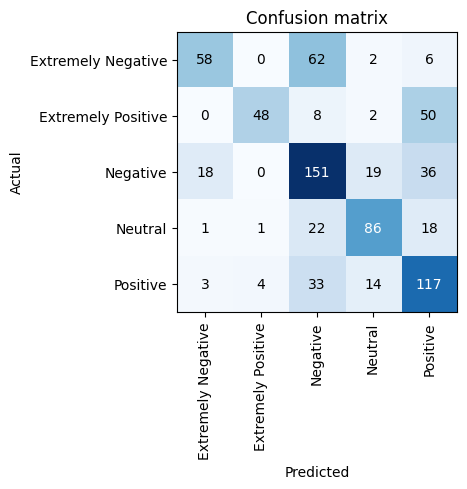

In [ ]:
# Plot confusion matrix
classif_interp = ClassificationInterpretation.from_learner(learn)
classif_interp.plot_confusion_matrix()

In [ ]:
# Get model mistakes
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

,input,target,predicted,probability,loss
0,"xxbos xxunk xxmaj the test for # xxup covid19 costs xxunk xxrep 3 0 xxunk ' xxrep 3 0 xxunk . xxup xxunk # xxmaj thailand site said only 4 hospitals have # covid_19 testing xxunk but not these two . xxmaj shame on them , raising the prices up that high . # coronavirus # xxup covid19 # xxup covid2019 # xxmaj covid_19 # xxrep 4 ?",Positive,Extremely Negative,0.6170220971107483,10.299567222595215
1,"xxbos xxmaj how is a # coronavirus lockdown effective ? xxmaj the virus xxunk for 3 hours ( air ) , 1 day ( xxunk - lovely online shopping deliveries ) and 3 days ( metal . ) https : / / t.co / xxunk xxmaj stop transmission entirely with a xxmaj china - style lockdown , xxunk through existing cases . # coronavirusuk",Extremely Positive,Negative,0.8220972418785095,7.592456817626953
2,"xxbos xxmaj when i watch a nature xxunk and see buffalo panicking in a stampede i want to xxunk at the xxunk , just work together and youâll all be ok . \r\r\n\r\r\n xxmaj then i went to the supermarket last night and i realized \r\r\n\r\r\n i am the buffalo . \r\r\n\r\r\n▁ # xxmaj covid_19 # pandemic # panicbuying",Extremely Negative,Positive,0.7934337258338928,7.335042476654053
3,"xxbos # coronavirus wonât be the death of me , starvation will be as shops all sold out of food xxrep 5 ? weâve xxunk become xxmaj america & & now stock piled everything leaving nothing on the shelves & & millions of pounds profits for the supermarkets who record better months sales than at xxmaj christmas",Extremely Positive,Negative,0.6114674210548401,6.234889507293701
4,xxbos xxup just xxup in : xxmaj our xxunk has just reached xxup xxunk million xxunk for our donation drive for # xxup covid19 health workers ! ? ? \r\r\n\r\r\n xxmaj xxunk xxmaj xxunk xxunk sa xxunk ng xxunk - donate ! xxmaj xxunk xxmaj xxunk ! https : / / t.co / xxunk,Extremely Negative,Positive,0.4979397654533386,5.563121795654297
5,xxbos xxmaj one grocery store in xxmaj xxunk has appealed to the customers to not come to the store when ill not xxunk the personnel not fight over stuff not steal stuff from other people s carts xxmaj this means that all of that happens xxmaj people have lost their minds,Positive,Extremely Negative,0.6229587197303772,5.560741901397705
6,xxbos i donât know why i was scared to go to the grocery store today â the only viruses i was exposed to were peopleâs bad - ass kids . # xxmaj covid_19 # coronapocalypse,Positive,Extremely Negative,0.9605608582496643,5.467304229736328
7,"xxbos xxmaj for those self xxunk in thoughts of food , medicine and essential household goods stock piling . xxmaj like people on universal credit be stock piling xxup ffs xxrep 3 ! # coronavirus",Negative,Positive,0.6524385213851929,5.364901542663574
8,xxbos xxmaj yet we supermarket employees still have to go to work . xxmaj hell xxrep 4 o … . ? ? xxmaj what about xxup us ? # xxmaj covid_19,Neutral,Extremely Negative,0.946061372756958,5.3563642501831055


## Exercise 2b

Using the trained LSTM model, perform prediction on the test set.